Сталь – один из важнейших строительных материалов современности. Стальные здания устойчивы к естественному и искусственному износу, что сделало этот материал повсеместно распространенным во всем мире. Чтобы сделать производство стали более эффективным, этот конкурс поможет выявить дефекты.


ссылка на каггл с этим соревнованием - https://www.kaggle.com/c/severstal-steel-defect-detection

### Постановка задачи :

Этот конкурс представляет собой двойной конкурс: классифицируйте тип дефекта стали, а также сегментируйте части изображения, содержащие дефект.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [4]:
data.shape

(7095, 3)

У нас 7095 и три фичи

# Разведочный анализ данных

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

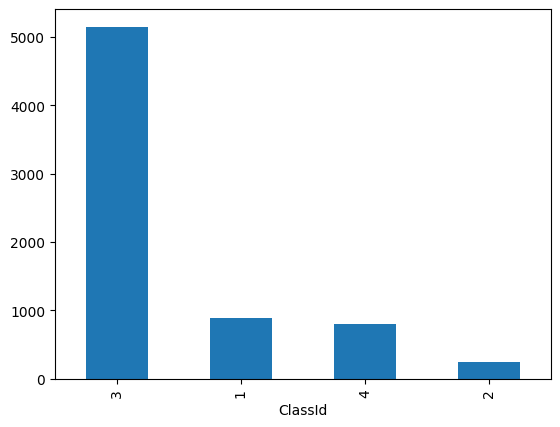

In [5]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

больше всего меток третьего класса

Перекос данных, поэтому выполним аугментацию.

In [6]:
import cv2

In [7]:
!unzip "train_images.zip" -d "train_images"

"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [8]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
    try:
      image=cv2.imread("train_images/{}".format(img),cv2.IMREAD_COLOR)
      image = cv2.resize(image,(120,120))
      l1.append(image)
      l2.append(ClassId)
    except:
      continue





100%|██████████| 7095/7095 [00:02<00:00, 2469.85it/s] 


In [9]:
l1[0]

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 74,  74,  74],
        [ 60,  60,  60],
        [ 64,  64,  64]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 73,  73,  73],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 75,  75,  75],
        [ 65,  65,  65],
        [ 61,  61,  61]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [105, 105, 105]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [108, 108, 108]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [117, 117, 117],
        [109, 109, 109],
        [109, 109, 109]]

In [10]:
len(l1)

351

Проверка изображений случайной стали, чтобы проверить, дефектна ли она или нет.

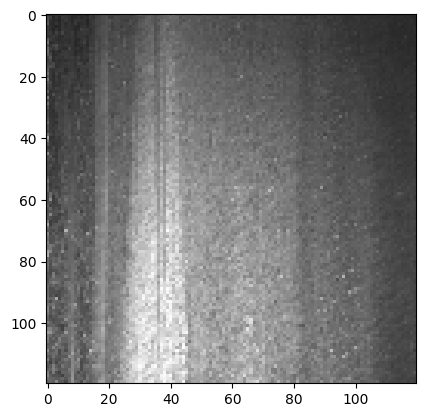

In [11]:
i = 15
plt.imshow(l1[i])

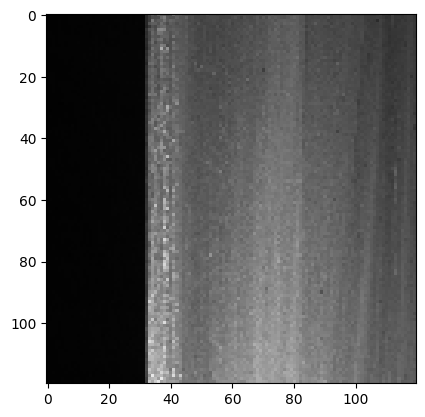

In [12]:
i = 16
plt.imshow(l1[i])

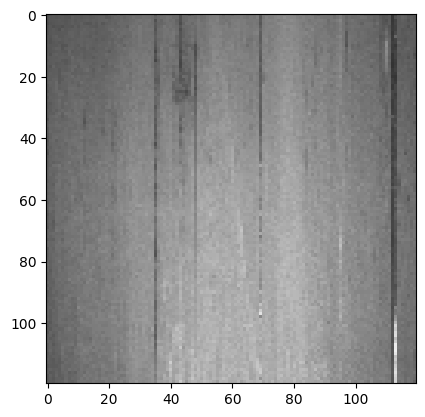

In [13]:
i = 90
plt.imshow(l1[i])

Выполним one-hot кодировку

In [14]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = np.array(y)


In [15]:
X.shape

(351, 120, 120, 3)

In [16]:
y.shape

(351,)

# Борьба с дибалансом

для борьбы с дисбалансом выполним случайное сэмплирование

In [17]:
from imblearn.over_sampling import RandomOverSampler
reshaped_X = X.reshape(X.shape[0],-1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X, y  = oversample.fit_resample(reshaped_X , y)
X = X.reshape(-1,120,120,3)

In [18]:
X.shape

(984, 120, 120, 3)

In [19]:

y = to_categorical(y)

In [20]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

разделим на тренировку и валидацию

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [22]:
print("x_train размер:",X_train.shape)
print("x_test размер:",X_test.shape)
print("y_train размер:",y_train.shape)
print("y_test размер:",y_test.shape)

x_train размер: (787, 120, 120, 3)
x_test размер: (197, 120, 120, 3)
y_train размер: (787, 4)
y_test размер: (197, 4)


# Построение нейронной сети  в 3 слоя и график обучения

In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(Flatten())
model.add(Dense(4,activation="softmax"))

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [25]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.2380 - loss: 10.2027 - val_accuracy: 0.3350 - val_loss: 10.9105
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.3271 - loss: 9.4163 - val_accuracy: 0.4975 - val_loss: 2.2685
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.4307 - loss: 3.0136 - val_accuracy: 0.4061 - val_loss: 2.4332
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.4575 - loss: 2.0207 - val_accuracy: 0.6193 - val_loss: 1.3830
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.6075 - loss: 1.1739 - val_accuracy: 0.6548 - val_loss: 0.8188
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7122 - loss: 0.6814 - val_accuracy: 0.7716 - val_loss: 0.7025
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.8107 - loss: 0.6022 - val_accuracy: 0.7970 - val_loss: 0.6474
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8464 - loss: 0.4962 - val_accuracy: 0.7970 - val_los

<Axes: title={'center': 'Loss curve'}>

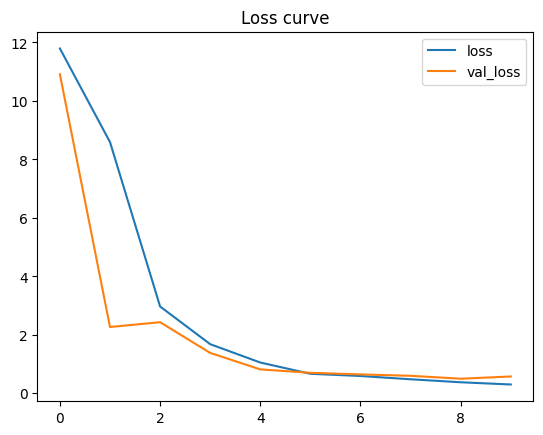

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

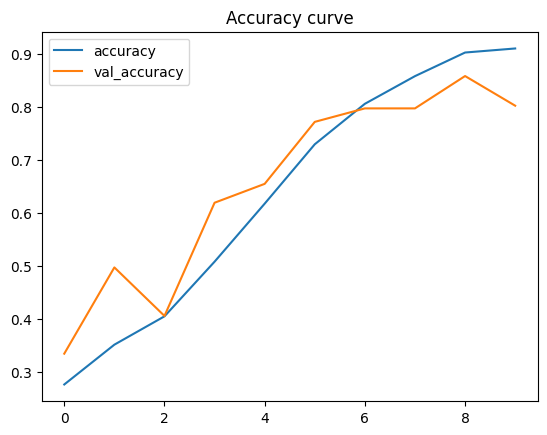

In [27]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

# Построение нейронной сети  в 5 слоев

In [28]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))


c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [30]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.2769 - loss: 4.0164 - val_accuracy: 0.3655 - val_loss: 1.3976
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.3947 - loss: 1.4620 - val_accuracy: 0.5533 - val_loss: 1.1691
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.5534 - loss: 1.0811 - val_accuracy: 0.6142 - val_loss: 0.9371
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.6741 - loss: 0.8773 - val_accuracy: 0.6650 - val_loss: 0.8367
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.7323 - loss: 0.7422 - val_accuracy: 0.7462 - val_loss: 0.7457
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.7583 - loss: 0.6637 - val_accuracy: 0.7411 - val_loss: 0.6855
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.8592 - loss: 0.5420 - val_accuracy: 0.8122 - val_loss: 0.6080
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.8860 - loss: 0.4630 - val_accuracy: 0.7970 - val_loss:

<Axes: title={'center': 'Loss curve'}>

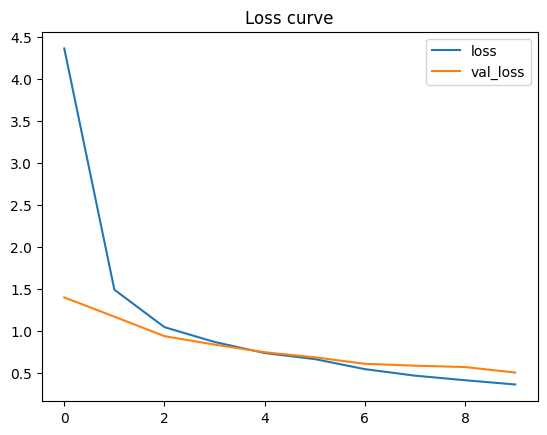

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

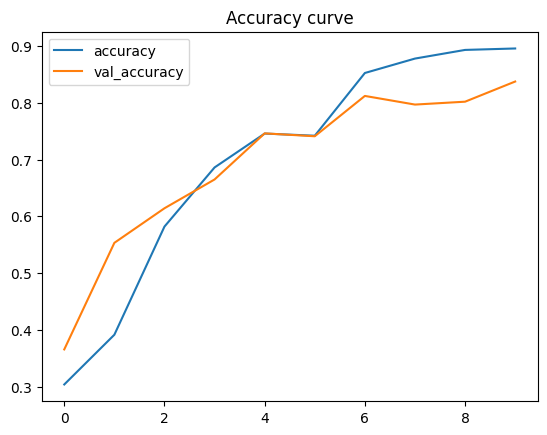

In [32]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

# Построение нейронной сети в 13 слоев и обучение

In [33]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [37]:
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

Сборка и обучение модели

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [35]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.2700 - loss: 1.3764 - val_accuracy: 0.3706 - val_loss: 1.3380
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.3345 - loss: 1.3603 - val_accuracy: 0.3959 - val_loss: 1.3145
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.3584 - loss: 1.3237 - val_accuracy: 0.4010 - val_loss: 1.2545
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.4135 - loss: 1.2675 - val_accuracy: 0.4924 - val_loss: 1.1752
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.4827 - loss: 1.1547 - val_accuracy: 0.5381 - val_loss: 1.0163
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.4784 - loss: 1.0684 - val_accuracy: 0.5939 - val_loss: 0.9500
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.5109 - loss: 0.9993 - val_accuracy: 0.5584 - val_loss: 0.9328
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.5517 - loss: 0.9523 - val_accuracy: 0.5685 - val_loss:

# Анализ результатов обучения

<Axes: title={'center': 'Loss curve'}>

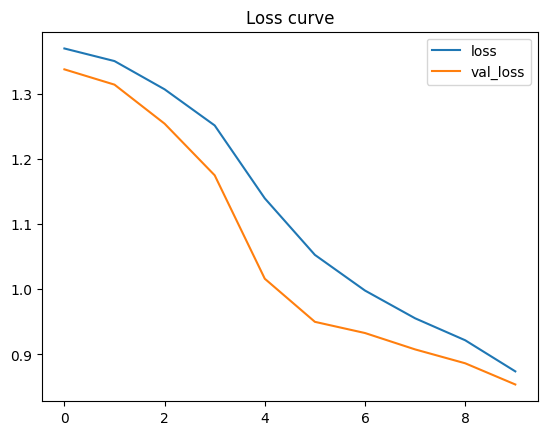

In [36]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

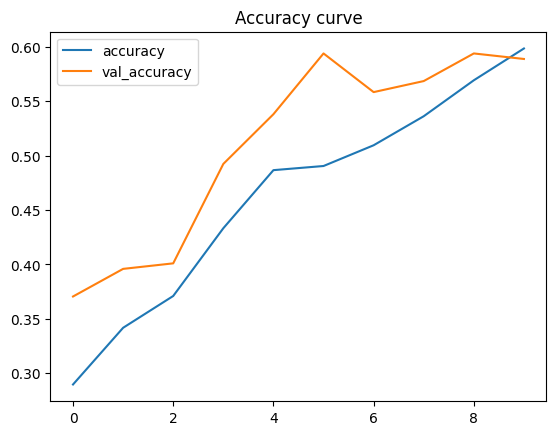

In [37]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [38]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5972 - loss: 0.8688
[+] Accuracy: 58.88%


In [39]:
from keras.models import Model
model.save('my_model_steel.keras')

In [40]:
from keras.models import load_model

loaded_model = load_model('my_model_steel.keras')


# Архитектура созданной нейронной сети

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,342 (1.60 MB)

 Trainable params: 139,780 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,562 (1.07 MB)

# Тестирование на новых примерах

In [42]:
l2[:3]

[3, 3, 3]

In [43]:
X= np.array(l1[:3])
X = X/255

y = encoder.fit_transform(l2[:3])
y = np.array(y)

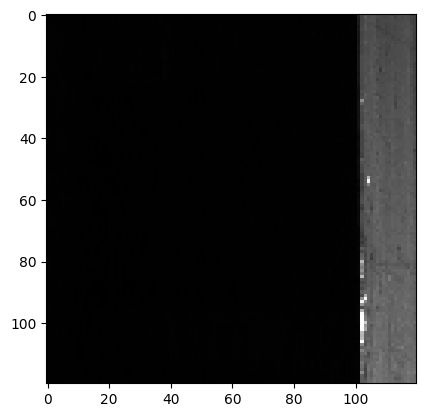

In [44]:
plt.imshow(l1[0]);

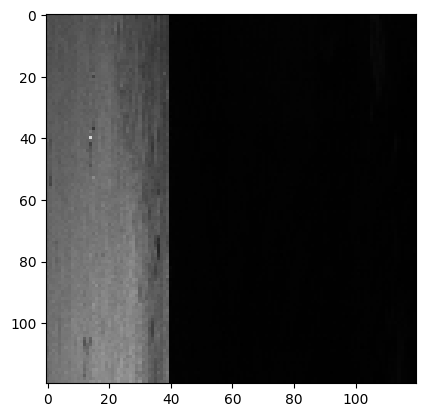

In [45]:
plt.imshow(l1[1]);

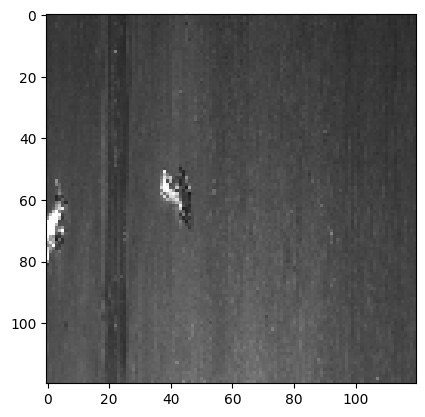

In [46]:
plt.imshow(l1[2]);

In [47]:
y =  to_categorical(y)
y

array([[1.],
       [1.],
       [1.]])

In [48]:

predictions = model.predict(X)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


array([[0.25685427, 0.6117711 , 0.07519371, 0.05618089],
       [0.09775096, 0.79799265, 0.07370235, 0.03055401],
       [0.06659961, 0.75527006, 0.15058462, 0.02754561]], dtype=float32)

Здесь три эксперимента, где мы видим, что тест № 2 был с меткой 3, но неверно идентифицировался как метка 1.

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,342 (1.60 MB)

 Trainable params: 139,780 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,562 (1.07 MB)

# описание архитектуры нейронной сети

У нас тут многослойная нейронная сеть с разными типами слоев.

теперь по поводу слоев нейронной сети и их особенностей.

1 слой - Conv2D. Он используется для выполнения двумерной свертки входных данных. Он применяет набор фильтров к входному изображению или карте объектов, перемещая их по входным данным и вычисляя скалярное произведение в каждом месте. Эта операция позволяет слою извлекать объекты и фиксировать пространственные отношения во входных данных. Уровень Conv2D обычно используется в сверточных нейронных сетях (CNN) для таких задач, как классификация изображений, обнаружение объектов и сегментация изображений.

2 слой - MaxPooling2D.  Это  операция понижающей дискретизации, которая уменьшает пространственные размеры (ширину и высоту) входного изображения или карты объектов. Он делит входные данные на непересекающиеся прямоугольники и выводит максимальное значение внутри каждого прямоугольника. Это помогает извлечь наиболее важные функции и снизить вычислительные требования для последующих слоев.

Далее эти слои повторяются еще 2 раза.

7 слой - Flatten. он преобразует входной тензор в одномерный массив, эффективно выравнивая его. Он принимает многомерный входной тензор, например двумерное изображение, и преобразует его в одномерный вектор, который можно использовать в качестве входных данных для полностью связного слоя или любого другого слоя, который ожидает одномерных входных данных.

8 слой - Dense. это полностью связный слой, который соединяет каждый нейрон предыдущего слоя с каждым нейроном текущего слоя. Он выполняет линейную операцию над входными данными, за которой следует функция активации, позволяющая сети изучать сложные закономерности и взаимосвязи в данных. Количество нейронов в плотном слое определяет размерность вывода.

9 cлой - Dropout. это метод регуляризации, используемый для уменьшения переобучения в нейронных сетях. Он случайным образом устанавливает для части входных единиц значение 0 на каждом этапе обучения, что помогает предотвратить слишком большую зависимость сети от конкретных функций или корреляций. Dropout улучшает способность модели к обобщению за счет внесения шума во время обучения и побуждает сеть изучать более надежные и независимые представления.

Далее слои повторяются.

В итоге в данной нейронной сети 12 различных слоев, и 139 780 параметров.

# DZ8

Для улучшения работы нейронной сети использовали следующее:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import warnings
import keras
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical

In [22]:
# Загрузка данных
data = pd.read_csv('train.csv')

In [23]:
# Предобработка данных
def preprocess_data(data):
    images = []
    labels = []
    for img, ClassId, EncodedPixels in tqdm(data.values):
        try:
            image = cv2.imread("train_images/{}".format(img), cv2.IMREAD_COLOR)
            image = cv2.resize(image, (120, 120))
            images.append(image)
            labels.append(ClassId)
        except:
            continue
    return np.array(images), np.array(labels)

X, y = preprocess_data(data)

  0%|          | 0/7095 [00:00<?, ?it/s]

100%|██████████| 7095/7095 [00:02<00:00, 2805.89it/s] 


In [24]:
# Нормализация данных
X = X / 255

In [25]:
# Преобразование меток в категориальные
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

In [26]:
# Увеличение датасета сбалансированными данными
reshaped_X = X.reshape(X.shape[0], -1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = oversample.fit_resample(reshaped_X, y)
X_resampled = X_resampled.reshape(-1, 120, 120, 3)

In [27]:
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)

In [28]:
# Построение нейронной сети
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dense(4, activation="softmax"))

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [30]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=128, verbose=1)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - accuracy: 0.2552 - loss: 1.3826 - val_accuracy: 0.4112 - val_loss: 1.3351
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.3696 - loss: 1.3395 - val_accuracy: 0.4213 - val_loss: 1.3016
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.4044 - loss: 1.2991 - val_accuracy: 0.4822 - val_loss: 1.2284
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.4554 - loss: 1.1997 - val_accuracy: 0.5076 - val_loss: 1.0746
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.4856 - loss: 1.0705 - val_accuracy: 0.5279 - val_loss: 1.0126
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.5194 - loss: 0.9991 - val_accuracy: 0.5178 - val_loss: 0.9828
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.5213 - loss: 0.9748 - val_accuracy: 0.5178 - val_loss: 0.9468
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.5268 - loss: 0.9520 - val_accuracy: 0.5228 - val_loss

In [31]:
# Оценка результатов обучения
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7340 - loss: 0.6105
[+] Accuracy: 71.57%


# Визуализация процесса обучения

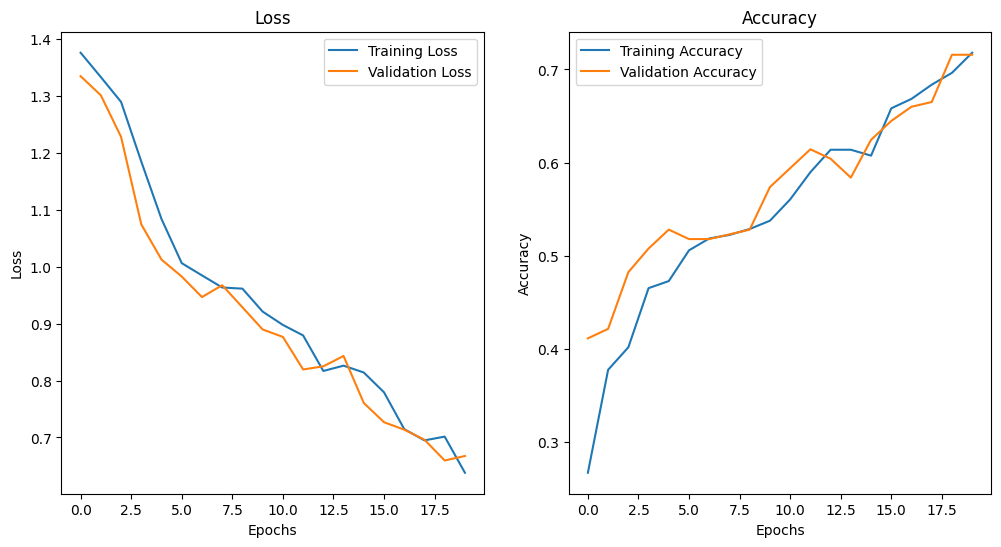

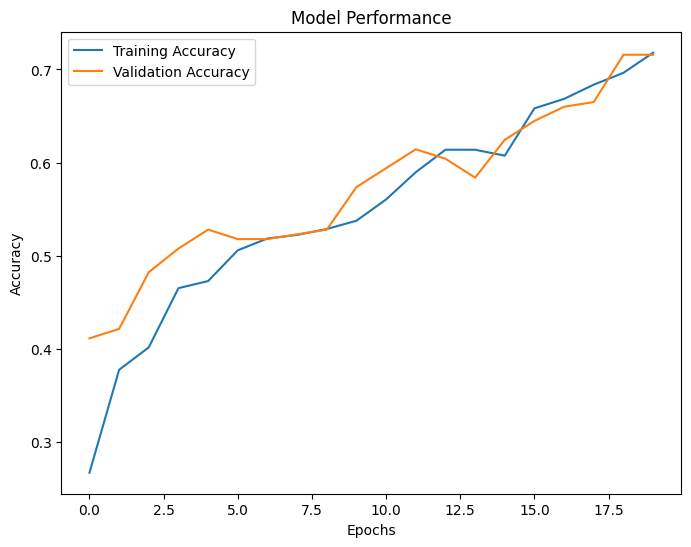

In [35]:
plt.figure(figsize=(12, 6))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График метрики точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Мониторинг изменения производительности модели
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Вывод:
В этой модели было сделано 
1. Увеличение размера датасета:
- Применение аугментации данных для увеличения разнообразия обучающих примеров.
- Использование методов балансировки классов для справедливого обучения нейронной сети на несбалансированных данных.
2. Выбор архитектуры нейронной сети:
- Экспериментирование с разными архитектурами нейронной сети, изменение количества слоев, размеров фильтров и т.д.
- Использование предобученных моделей для передачи обучения (transfer learning).
3. Оптимизация гиперпараметров:
- Тонкая настройка гиперпараметров, таких как learning rate, batch size и количество эпох обучения.
- Применение методов оптимизации, таких как адаптивные методы градиентного спуска (Adam) для более эффективного обучения.
4. Регуляризация:
- Использование методов регуляризации, таких как dropout, чтобы предотвратить переобучение модели.
5. Мониторинг обучения:
- Визуализация процесса обучения с помощью графиков потерь (loss) и метрик (accuracy) на обучающем и валидационном наборах данных.
- Мониторинг изменения производительности модели с течением времени для выявления переобучения или недообучения.
Такой способ существенно увеличил результат обучения.

# Теперь добавим сегментацию с помощью CNN:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns  # For optional visualizations
import warnings
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Input, UpSampling2D, Concatenate
from keras.utils import to_categorical

# Загрузка и предварительная обработка данных

In [41]:
def preprocess_data(data):
    images = []
    labels = []
    for img, ClassId, EncodedPixels in tqdm(data.values):
        try:
            image = cv2.imread("train_images/{}".format(img), cv2.IMREAD_COLOR)
            image = cv2.resize(image, (120, 120))
            images.append(image)
            labels.append(ClassId)
        except Exception as e:
            #print(f"Error processing image: {img}. Skipping...")
            continue
    return np.array(images), np.array(labels)

data = pd.read_csv('train.csv')
X, y = preprocess_data(data)

100%|██████████| 7095/7095 [00:02<00:00, 2856.24it/s] 


# Нормализация данных

In [42]:
X = X / 255

# Кодирование меток и преобразование в формат one-hot

In [43]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Решение проблемы несбалансированных классов

In [44]:
reshaped_X = X.reshape(X.shape[0], -1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = oversample.fit_resample(reshaped_X, y)
X_resampled = X_resampled.reshape(-1, 120, 120, 3)

# Разделение на обучающий и тестовый наборы

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)

# Функция для визуализации

In [46]:
def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

# Определение модели CNN 

In [47]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(120, 120, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Обучение модели CNN

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2843 - loss: 2.3389 - val_accuracy: 0.3706 - val_loss: 1.2586
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4325 - loss: 1.2024 - val_accuracy: 0.5482 - val_loss: 0.9561
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5210 - loss: 1.0180 - val_accuracy: 0.6091 - val_loss: 0.8676
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5662 - loss: 0.9155 - val_accuracy: 0.6548 - val_loss: 0.7607
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5817 - loss: 0.8724 - val_accuracy: 0.6244 - val_loss: 0.7646
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6017 - loss: 0.8209 - val_accuracy: 0.7157 - val_loss: 0.6404
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6583 - loss: 0.7402 - val_accuracy: 0.6954 - val_loss: 0.6382
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7041 - loss: 0.6502 - val_accuracy: 0.7665 - val_loss: 0.5432
Epoch 9/

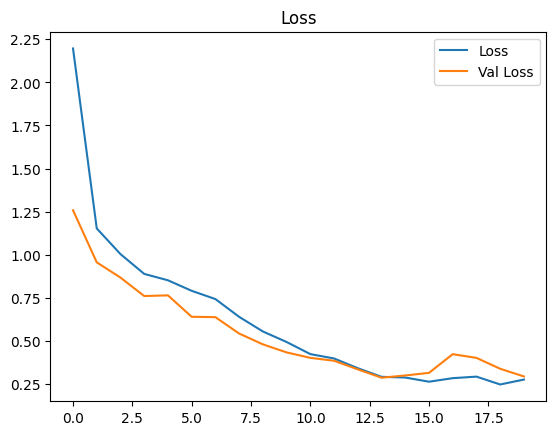

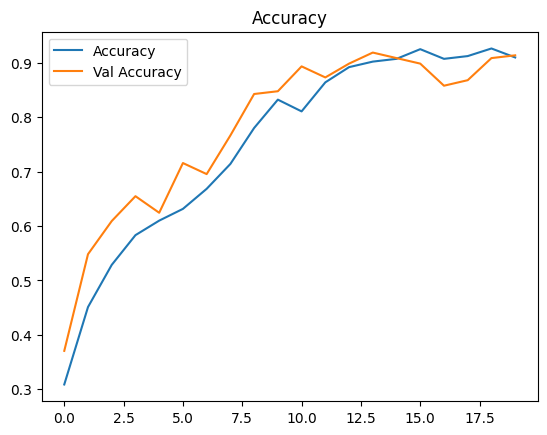

In [48]:
cnn_model = create_cnn_model()
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=128, verbose=1)
plot_learning_curves(history)

# Оценка модели CNN

In [49]:
cnn_model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9148 - loss: 0.3012


[0.2943366467952728, 0.913705587387085]

# Вывод 

В этой модели мы создали сверточную нейронную сеть (CNN) для классификации изображений:

1. Conv2D слои: Мы использовали три слоя Conv2D с различными количествами фильтров (64, 128, 256), каждый с ядром размером 3x3. Мы также использовали параметр padding='same', чтобы сохранить размеры признаковых карт после свертки.
2. MaxPooling2D слои: После каждого Conv2D слоя мы добавили слой MaxPooling2D с размером пула (2, 2), чтобы уменьшить размерность признаковых карт.
3. Flatten слой: После последнего MaxPooling2D слоя мы добавили Flatten слой для преобразования признаковых карт в одномерный вектор перед подачей их на полносвязные слои.
4. Полносвязные слои: После Flatten слоя мы добавили один полносвязный слой с 512 нейронами и функцией активации ReLU. Мы также добавили Dropout слой с коэффициентом 0.5 для регуляризации и предотвращения переобучения.
5. Выходной слой: Финальный полносвязный слой имеет 4 нейрона (так как у нас 4 класса для классификации) с функцией активации softmax, которая предсказывает вероятности принадлежности к каждому классу.
6. Компиляция модели: Модель была скомпилирована с использованием категориальной кросс-энтропии в качестве функции потерь, оптимизатора Adam и метрики точности (accuracy) для оценки производительности модели во время обучения и оценки.

Из вывода обучения видно, что модель достигает точности около 91.48% на обучающем наборе и потери около 0.3012, а на тестовом наборе точность составляет около 91.37% с потерями около 0.2943 после 20 эпох обучения. Это свидетельствует о том, что модель достаточно хорошо обучена и способна делать достаточно точные прогнозы на новых данных. Это самый лучший результат!

# Создадим модель, состоящую  из нескольких слоев Conv2D, MaxPooling2D, Flatten, Dense и Dropout, которые работают вместе для классификации изображений на четыре класса.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical

# Загрузка данных

In [10]:
data = pd.read_csv('train.csv')

# Загрузка изображений и их классов

In [11]:
def load_images_and_labels(data):
    images = []
    labels = []
    for img, ClassId, EncodedPixels in tqdm(data.values):
        try:
            image = cv2.imread("train_images/{}".format(img), cv2.IMREAD_COLOR)
            image = cv2.resize(image, (120, 120))
            images.append(image)
            labels.append(ClassId)
        except:
            continue
    return np.array(images), np.array(labels)

In [12]:
X, y = load_images_and_labels(data)

100%|██████████| 7095/7095 [00:02<00:00, 2980.38it/s] 


# Предобработка данных

In [13]:
X = X / 255.0
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Решение проблемы несбалансированных классов

In [14]:
reshaped_X = X.reshape(X.shape[0], -1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = oversample.fit_resample(reshaped_X, y)
X_resampled = X_resampled.reshape(-1, 120, 120, 3)
y_resampled = to_categorical(y_resampled)

# Разделение на обучающий и тестовый наборы

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)

# Построение модели сегментации

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\chern\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Обучение модели

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128, verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 671ms/step - accuracy: 0.3010 - loss: 1.3570 - val_accuracy: 0.5076 - val_loss: 1.2747
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.4718 - loss: 1.2546 - val_accuracy: 0.5076 - val_loss: 1.0352
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 0.5323 - loss: 1.0221 - val_accuracy: 0.5330 - val_loss: 0.9440
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 521ms/step - accuracy: 0.5646 - loss: 0.9440 - val_accuracy: 0.5533 - val_loss: 0.9385
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.5702 - loss: 0.9042 - val_accuracy: 0.5635 - val_loss: 0.8836
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.6479 - loss: 0.7917 - val_accuracy: 0.5939 - val_loss: 0.7963
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 0.6405 - loss: 0.7791 - val_accuracy: 0.6954 - val_loss: 0.7313
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.6940 - loss: 0.6636 - val_accuracy: 0.6904 - val_loss

# Анализ результатов обучения

<Axes: title={'center': 'Accuracy curve'}>

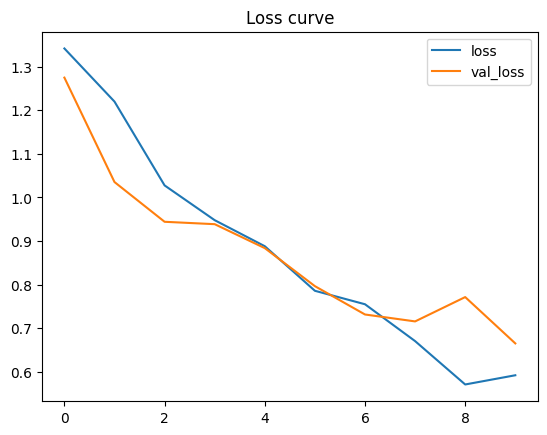

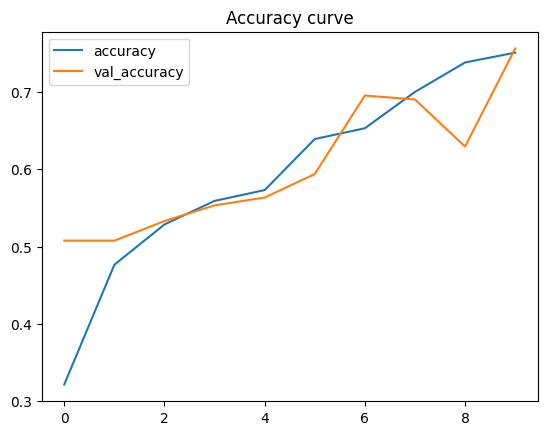

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss curve')
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Accuracy curve')

# Оценка модели

In [20]:
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
print(f"Loss: {loss}, Accuracy: {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7579 - loss: 0.6383
Loss: 0.6650037169456482, Accuracy: 0.7563451528549194


# Вывод

Эта модель представляет собой сверточную нейронную сеть (CNN) для классификации изображений:

1. Conv2D слои: Мы добавили три слоя Conv2D с различным количеством фильтров (32, 64, 64) и размером ядра 3x3. Эти слои извлекают признаки изображений.
2. MaxPooling2D слои: После каждого Conv2D слоя мы добавили слой MaxPooling2D для уменьшения размерности признаковых карт и повышения инвариантности к масштабу и переносу.
3. Flatten слой: После последнего MaxPooling2D слоя мы добавили Flatten слой, который преобразует признаковые карты в одномерный вектор перед подачей их на полносвязные слои.
4. Полносвязные слои: После Flatten слоя мы добавили два полносвязных слоя с 128 нейронами и функцией активации ReLU. Dropout слои с коэффициентом 0.2 были вставлены после каждого полносвязного слоя для регуляризации и предотвращения переобучения.
5. Выходной слой: Финальный полносвязный слой имеет 4 нейрона (так как у нас 4 класса для классификации) с функцией активации softmax, которая предсказывает вероятности принадлежности к каждому классу.
6. Компиляция модели: Модель была скомпилирована с использованием категориальной кросс-энтропии в качестве функции потерь, оптимизатора Adam и метрики точности (accuracy) для оценки производительности модели во время обучения и оценки.

И это позволило нам поднять точность предсказания до 75,79 %

